<a href="https://colab.research.google.com/github/innovinitylabs/learning-pytorch/blob/main/01_pytorch_workflow_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.1.0'

In [2]:
weight = 0.7
bias = 0.3 # weight and bias are known parameters

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim= 1)



In [3]:
torch.arange(start, end, step).unsqueeze(dim = 0)[:10]

tensor([[0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]])

In [4]:
torch.arange(start, end, step).unsqueeze(dim = -1)[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [5]:
torch.arange(start, end, step).unsqueeze(dim = -2)[:10]

tensor([[0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]])

In [6]:
y = weight * X + bias

In [7]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
len(X), len(y)

(50, 50)

In [9]:
train_samp = int(.8 * len(X))
X_train, y_train = X[:train_samp], y[:train_samp]
X_test, y_test = X[train_samp:], y[train_samp:]

len(X_train),len(y_train),len(X_test),len(y_test),

(40, 40, 10, 10)

to visualise data

In [10]:
def plot_pred(train_data= X_train, train_labels= y_train,
              test_data= X_test, test_labels= y_test,
              predictions= None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Prediction')

  plt.legend(prop={'size': 14})


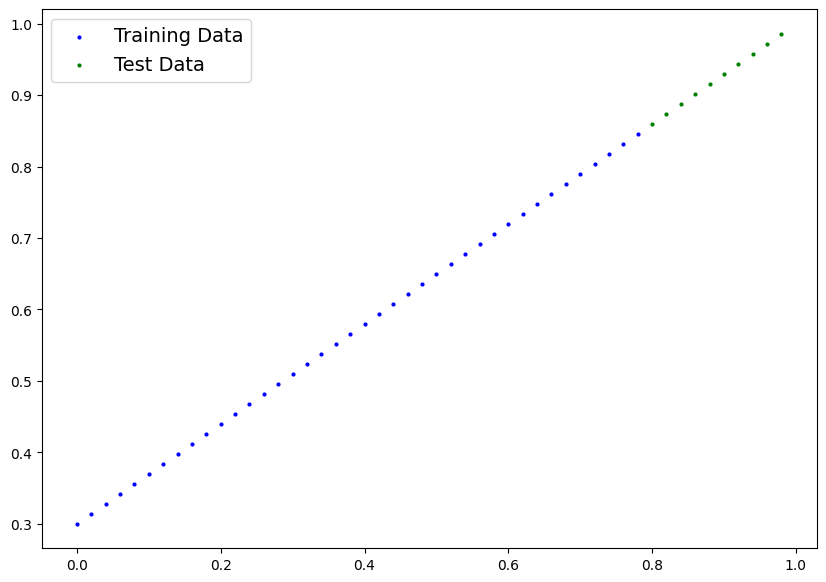

In [11]:
plot_pred()

## building first pytorch model

In [12]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [13]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

makign predictions with inference mode

In [17]:
y2_pred = model_0(X_test) #this uses grad
y2_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [16]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred , y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

this is to make the prediction run faster without using fancy things like grad. we can also use torch.nograd()

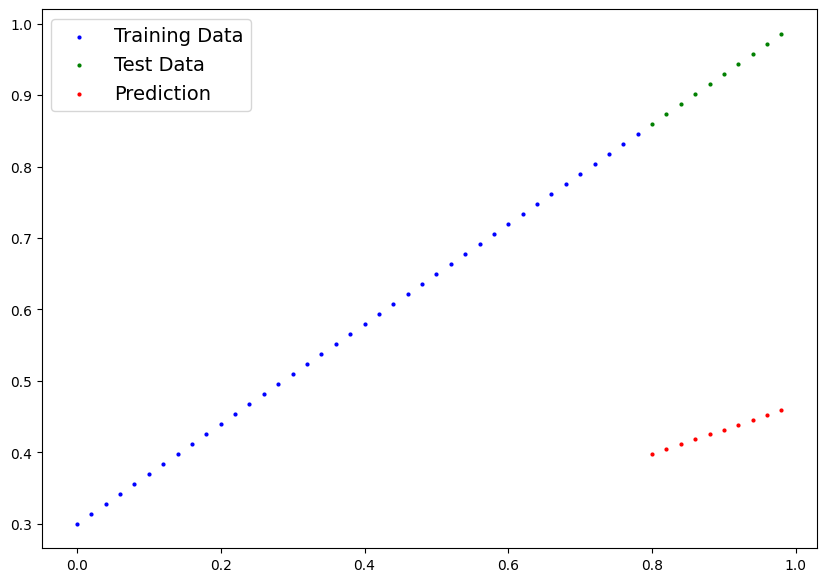

In [19]:
plot_pred(predictions=y_pred)

setting up loss functions (mean absolute error here)

In [22]:
loss_fn = nn.L1Loss()

setting up optimiser (we use sgd here)

In [21]:
opti = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

building a training loop

In [29]:
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):

    model_0.train() #01 training the modelsetting model to training mode

    y_pred = model_0(X_train) #02 forward pass

    loss = loss_fn(y_pred, y_train) #03 calculate loss function
    print(f'loss: {loss}')

    opti.zero_grad() #04 reset optimises

    loss.backward() #05 perform back propogation

    opti.step() #06 step the optimiser (performing gradient descent here)

    print(model_0.state_dict())

    



loss: 0.0025885060895234346
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.00893248151987791
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885060895234346
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.00893248151987791
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885060895234346
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.00893248151987791
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885060895234346
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.00893248151987791
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885060895234346
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.00893248151987791
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])


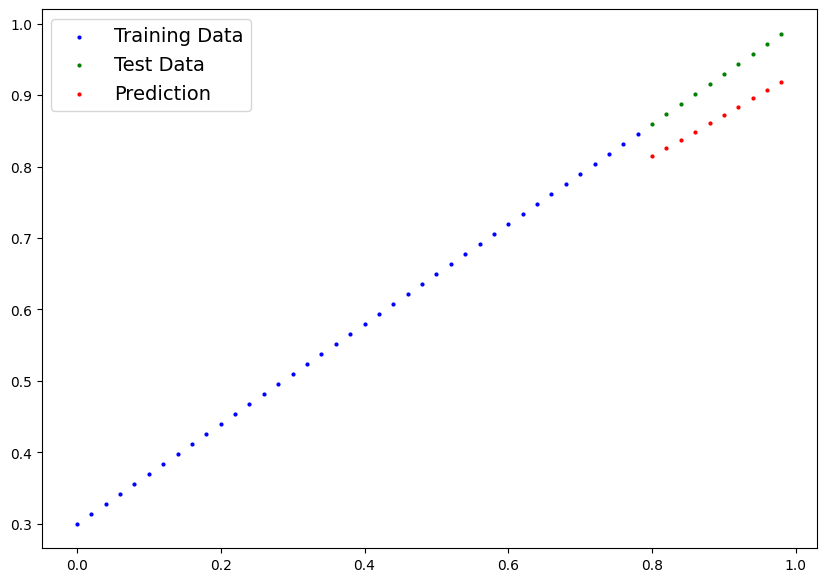

In [25]:
with torch.no_grad():
        y_pred = model_0(X_test)
        plot_pred(predictions=y_pred) #for 100 loop

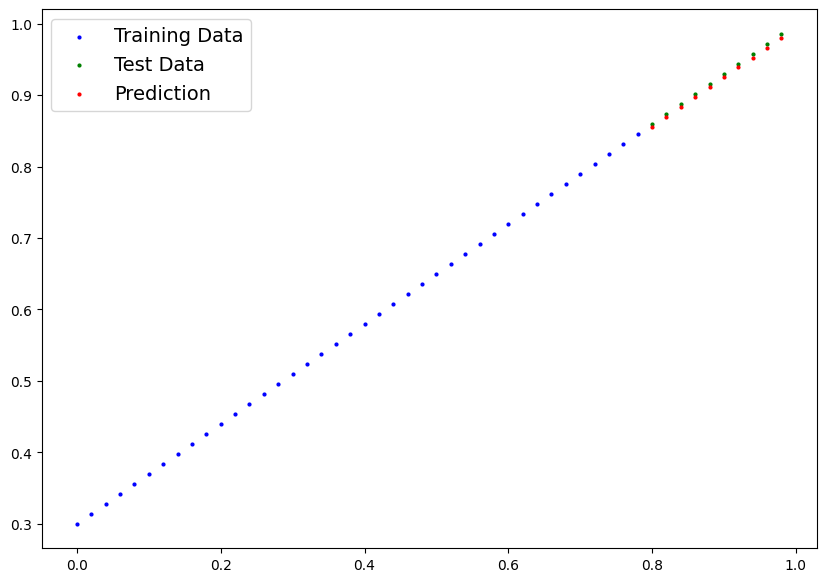

In [28]:
with torch.no_grad():
        y_pred = model_0(X_test)
        plot_pred(predictions=y_pred) #for 150 loop

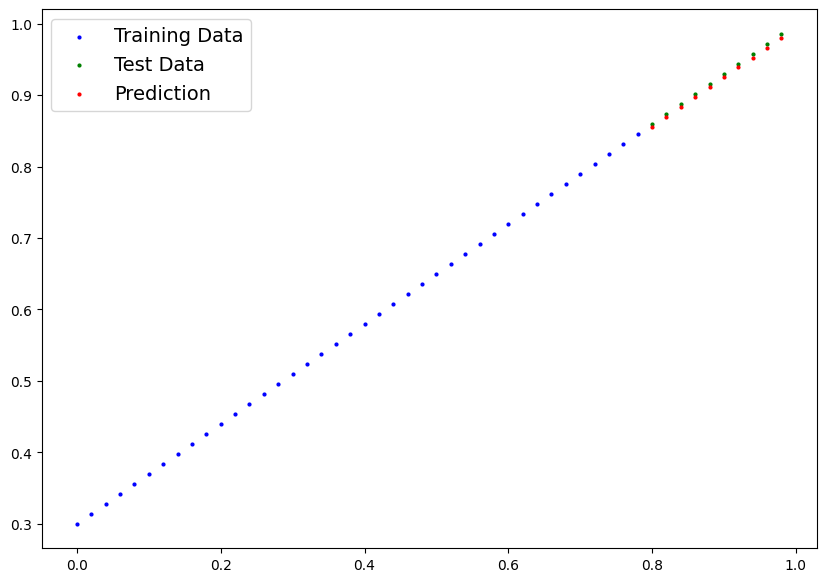

In [31]:
with torch.inference_mode():
        y_pred = model_0(X_test)
        plot_pred(predictions=y_pred) #for 200 loop